In [293]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import signal



from scipy import signal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

import pickle 
import matplotlib.colors

from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D,ConvLSTM1D, MaxPooling1D, Flatten, LSTM,BatchNormalization,AveragePooling1D

from sklearn.neighbors import KNeighborsRegressor

participants_dps_csv_data = pd.read_csv("/Users/cslinxs/Desktop/all_weeks/pwdb_model_configs.csv")

print(participants_dps_csv_data.get(" dbp [mmHg]")[4])

78.067


In [310]:
charlton_point_dbp = [[],[],[]]
# plt.figure(figsize=(5, 5)) 
# plt.rcParams['figure.figsize'] = [5, 5]




charlton_dict_people_ages = {}

for i in range(20,80,10):
    charlton_dict_people_ages[str(i)] = [[],[]]

print(charlton_dict_people_ages)

# will track age,dbp values
charlton_set_seen_duplicates =set()

Charlton_dataset_csv = "/Users/cslinxs/Desktop/all_weeks/Charlton_dataset_csv"
for files in os.listdir(Charlton_dataset_csv):
    if "_P.Csv" in files.title() and "Digital" in files.title():
        body_part = files.title().split("_")[1]
        function = files.title().split("_")[2]
        participants_csv_data = pd.read_csv(Charlton_dataset_csv+"/"+files)
        
        #plt.figure(figsize=(4, 5)) 
        for i in range(len(participants_csv_data)):
            y_points = participants_csv_data.iloc[i][1:].dropna()
            
            resampled_y = signal.resample(y_points, 50)
            resampled_y = [int(y - min(resampled_y)) for y in resampled_y]
            
            if not(True in list(np.isnan(resampled_y))):
                indivuals_set = (participants_dps_csv_data.get(" age [years]")[i],participants_dps_csv_data.get(" dbp [mmHg]")[i],participants_dps_csv_data.get(" pvr [Pa s/m^3]")[i])
                if not(indivuals_set in charlton_set_seen_duplicates):
                    charlton_point_dbp[0].append(resampled_y)
                    charlton_point_dbp[1].append(participants_dps_csv_data.get(" dbp [mmHg]")[i])
                    charlton_point_dbp[2].append(participants_dps_csv_data.get(" mbp [mmHg]")[i])
                    
                    #plt.plot(resampled_y,linewidth=3.0, color="indigo" )
                    charlton_set_seen_duplicates.add(indivuals_set)
                    charlton_dict_people_ages[str((indivuals_set[0]//10)*10)][0].append(resampled_y)
                    charlton_dict_people_ages[str((indivuals_set[0]//10)*10)][1].append(participants_dps_csv_data.get(" dbp [mmHg]")[i])
        #plt.title(f"Charlton Sigital Wrist Data")
        
        
        # plt.xlabel("Time[s]")
        # plt.ylabel("Pressure")
        # plt.xticks([])
        # plt.yticks([])
        #plt.show()
print(len(charlton_set_seen_duplicates))


{'20': [[], []], '30': [[], []], '40': [[], []], '50': [[], []], '60': [[], []], '70': [[], []]}
162


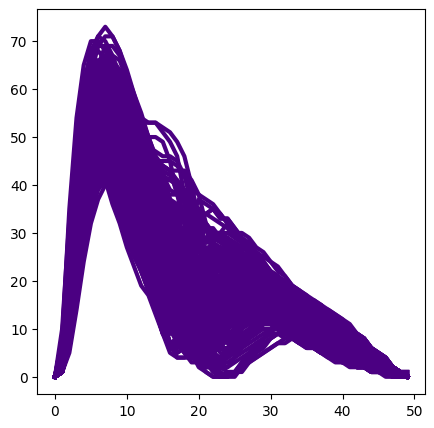

In [230]:
charlton_point_dbp = [[],[],[]]

# will track age,dbp values
charlton_set_seen_duplicates =set()

Charlton_dataset_csv = "/Users/cslinxs/Desktop/all_weeks/Charlton_dataset_csv"
for files in os.listdir(Charlton_dataset_csv):
    if "_P.Csv" in files.title() and "Digital" in files.title():
        body_part = files.title().split("_")[1]
        function = files.title().split("_")[2]
        participants_csv_data = pd.read_csv(Charlton_dataset_csv+"/"+files)
        
        for i in range(len(participants_csv_data)):
            y_points = participants_csv_data.iloc[i][1:].dropna()
            
            resampled_y = signal.resample(y_points, 50)
            resampled_y = [inta(y - min(resampled_y)) for y in resampled_y]
            
            if not(True in list(np.isnan(resampled_y))):
                indivuals_set = (participants_dps_csv_data.get(" age [years]")[i],participants_dps_csv_data.get(" dbp [mmHg]")[i],participants_dps_csv_data.get(" pvr [Pa s/m^3]")[i])
                if not(indivuals_set in charlton_set_seen_duplicates):
                    charlton_point_dbp[0].append(resampled_y)
                    charlton_point_dbp[1].append(participants_dps_csv_data.get(" dbp [mmHg]")[i])
                    charlton_point_dbp[2].append(participants_dps_csv_data.get(" mbp [mmHg]")[i])
                    
                    plt.plot(resampled_y,linewidth=3.0, color="indigo" )
                    charlton_set_seen_duplicates.add(indivuals_set)
                  

In [318]:
charlton_dict_people_ages["20"][1]

[74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9,
 74.9]

In [305]:
for i in charlton_dict_people_ages:
    print(i,(charlton_dict_people_ages[i][0]))

20 [[0, 1, 10, 25, 39, 46, 49, 50, 49, 45, 41, 36, 32, 28, 24, 21, 19, 16, 13, 10, 9, 11, 13, 14, 15, 16, 16, 16, 16, 15, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 3, 2, 2, 1, 1, 0, 0], [0, 3, 15, 32, 43, 48, 49, 47, 44, 39, 34, 30, 26, 23, 20, 18, 15, 12, 13, 15, 17, 18, 18, 18, 18, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 0, 0], [0, 1, 8, 22, 36, 44, 48, 49, 48, 45, 41, 36, 32, 27, 23, 20, 17, 15, 11, 8, 7, 8, 10, 12, 13, 14, 15, 15, 15, 15, 14, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 3, 2, 1, 1, 1, 0, 0], [0, 1, 8, 20, 31, 38, 41, 41, 40, 37, 33, 29, 25, 21, 18, 16, 13, 9, 6, 6, 8, 9, 11, 11, 12, 13, 13, 13, 12, 12, 11, 11, 10, 9, 8, 7, 7, 6, 5, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0], [0, 2, 13, 30, 46, 54, 57, 58, 56, 53, 48, 43, 38, 34, 30, 26, 23, 21, 19, 17, 14, 13, 15, 17, 18, 19, 19, 19, 19, 18, 18, 17, 16, 15, 14, 12, 11, 9, 8, 7, 6, 5, 4, 3, 3, 2, 1, 1, 0, 0], [0, 2, 12, 28, 41, 48, 51, 52, 50, 46, 41, 37, 33, 29, 25, 23, 20, 18, 14, 12, 12

In [194]:

participants_dps_csv_data = pd.read_csv("/Users/cslinxs/Desktop/all_weeks/pwdb_model_configs.csv")

# print(len(set(participants_dps_csv_data.get(" dbp [mmHg]"))))
# print(len(set(participants_dps_csv_data.get(" sv [ml]"))))

# print(len(set(participants_dps_csv_data.get(" pvr [Pa s/m^3]"))))

# for column in participants_dps_csv_data:
#     print(column, len(set(participants_dps_csv_data[column])))

In [195]:
print(len(all_points))

162


162


Text(79.455, 74.69500000000001, 'r2 -0.65')

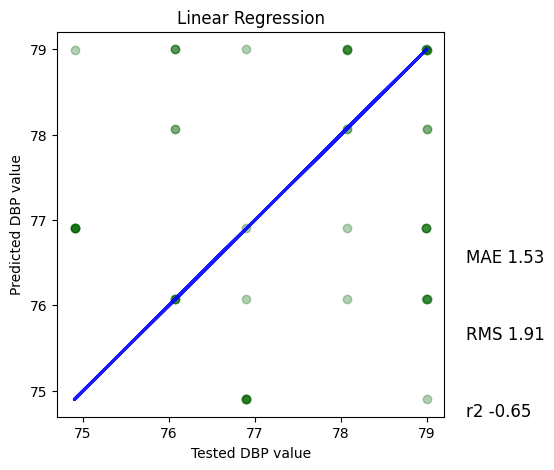

In [431]:
# single ones
plt.figure(figsize=(5, 5)) 
n_neighbors=1
neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
#neigh = LinearRegression()


all_points = np.array(charlton_point_dbp[0])
all_points = all_points.reshape(all_points.shape[0], -1)
print(len(all_points))
X_train, X_test, Y_train, Y_test = train_test_split(all_points, np.array(charlton_point_dbp[1]), test_size=0.3)


X_test = X_test.reshape(X_test.shape[0], -1)

 
the_fit= neigh.fit(X_train, Y_train)

y_predict= neigh.predict(X_test)


plt.rcParams.update({'font.size': 10})

plt.scatter(Y_test, y_predict,  color="darkgreen",  alpha=0.3 )
plt.plot(Y_test, Y_test, color="blue", linewidth=2, alpha=0.9)

plt.title(f"KNN")
plt.title(f"Linear Regression")



plt.xlabel("Tested DBP value")
plt.ylabel("Predicted DBP value")

xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.4,s=f"MAE {round(mean_absolute_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.2, s= f"RMS {round(root_mean_squared_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin, s= f"r2 {round(r2_score(Y_test, y_predict),2)}", fontsize=12)


/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/1334999978.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_keys)
/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/1334999978.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(age_keys)


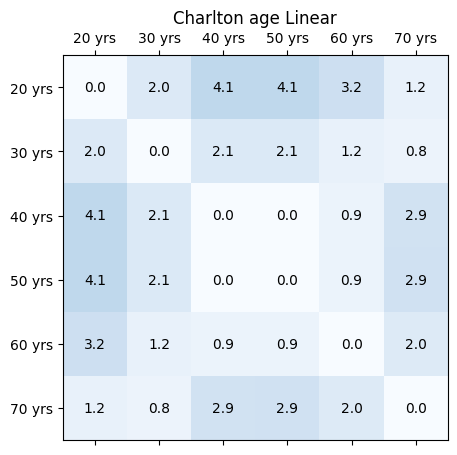

<Figure size 400x400 with 0 Axes>

In [290]:
# heat plots

# single ones
#neigh = KNeighborsRegressor(n_neighbors=1)


all_age_mae= []
maxi_mean = 0
for training_age in range(20,80,10):
    training_age = str(training_age)

    this_age_mae = []
    for testing_age in range(20,80,10):
        testing_age= str(testing_age)
        #neigh = LinearRegression()
        
        neigh = KNeighborsRegressor(n_neighbors=1)


        X = charlton_dict_people_ages[str(training_age)][0]
        Y = charlton_dict_people_ages[str(training_age)][1]

        X_other = charlton_dict_people_ages[str(testing_age)][0]
        Y_other = charlton_dict_people_ages[str(testing_age)][1]

        



        tests_size = int(len(Y)*0.3)

        X_test= np.array(X_other[:tests_size])
        Y_test= np.array(Y_other[:tests_size])

        X_test = X_test.reshape(X_test.shape[0], -1)
        Y_test = Y_test.reshape(Y_test.shape[0], -1)




        X_train =  np.array(X[tests_size:])
        Y_train= Y[tests_size:]


        X_train = X_train.reshape(X_train.shape[0], -1)



        the_fit= neigh.fit(X_train, Y_train)

        y_predict= neigh.predict(X_test)#, auscultatory_sbp[10])



        MAE = round(mean_absolute_error(Y_test, y_predict),2)


        #print(MAE)
        this_age_mae.append(MAE)

    if max(this_age_mae)>maxi_mean:
        maxi_mean= max(this_age_mae)
    all_age_mae.append(this_age_mae)








data = np.matrix(all_age_mae)

fig, ax = plt.subplots()
plt.figure(figsize=(4, 4)) 
cmap = matplotlib.colors.ListedColormap(['white','blue'])

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Blues', vmin=0, vmax=15)
age_keys = [str(num)+" yrs" for num in range(10,90,10)]
plt.rcParams.update({'font.size': 10})
ax.set_xticklabels(age_keys)
ax.set_yticklabels(age_keys)

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color = "black")
#bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3' )
ax.set_title("Charlton age Linear")
plt.show()




/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/4060384866.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_keys)
/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/4060384866.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(age_keys)


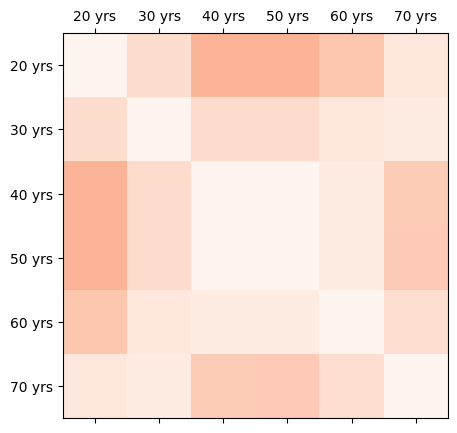

<Figure size 400x400 with 0 Axes>

In [291]:
data = np.matrix(all_age_mae)

fig, ax = plt.subplots()
plt.figure(figsize=(4, 4)) 
cmap = matplotlib.colors.ListedColormap(['white','red'])

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Reds', vmin=0, vmax=15)
age_keys = [str(num)+" yrs" for num in range(10,90,10)]
plt.rcParams.update({'font.size': 10})
ax.set_xticklabels(age_keys)
ax.set_yticklabels(age_keys)


for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, f"", ha='center', va='center', color = "white")
#bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3' )

plt.show()

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D,ConvLSTM1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error


import pickle

import pandas as pd
from pathlib import Path

import tensorflow as tf


In [429]:
# heat plots

# single ones
#neigh = KNeighborsRegressor(n_neighbors=1)


all_age_mae= []
maxi_mean = 0
for training_age in range(20,80,10):
    training_age = str(training_age)

    this_age_mae = []
    for testing_age in range(20,80,10):
        testing_age= str(testing_age)
        


        X = charlton_dict_people_ages[str(training_age)][0]
        Y = charlton_dict_people_ages[str(training_age)][1]

        X_other = charlton_dict_people_ages[str(testing_age)][0]
        Y_other = charlton_dict_people_ages[str(testing_age)][1]

        



        tests_size = int(len(Y)*0.3)

        X_test= np.array(X[:tests_size])
        Y_test= np.array(Y[:tests_size])

        X_test = X_test.reshape(X_test.shape[0], -1)
        Y_test = Y_test.reshape(Y_test.shape[0], -1)

        X_train= np.array(X_other)
        Y_train= np.array(Y_other)

        X_train = X_test.reshape(X_train.shape[0], -1)
        Y_train = Y_test.reshape(Y_test.shape[0], -1)


        #X = get_person_data_group(group_ppl_age,training_age)[0]
        # X = [item[0] for item in get_person_data_group(group_ppl_age,training_age)[0]]
        # y = get_person_data_group(group_ppl_age,training_age)[1]
        # print(y)
        # scaler = StandardScaler()
        # X = scaler.fit_transform(np.array(X))
        #print(X.shape)
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_test= np.array(X_other)
        Y_test= np.array(Y_other)

        X_test = X_test.reshape(X_test.shape[0], -1)
        Y_test = Y_test.reshape(Y_test.shape[0], -1)
        X_train= np.array(X_train)
       # print(y_train)


        def create_model():
            model = Sequential()
            model.add(Conv1D(filters=32, kernel_size=2,strides=2, activation='relu', input_shape=((X_train).shape[1],1)))
            model.add(Dropout(0.5))
            model.add(Conv1D(64, kernel_size=5, strides=5, activation='relu'))
            model.add(Dropout(0.5))
            model.add(Conv1D(128, kernel_size=3, strides=1, activation='relu'))
            model.add(Dropout(0.5))
            model.add(Flatten())


            optimizer = RMSprop(0.001)

            model.compile(loss='mse',
                        optimizer=optimizer,
                        metrics=['mae',])

            return model
        model = create_model()
        history = model.fit(X_train, tf.stack(Y_train), epochs=50, validation_split=0.3)
        test_loss, test_accuracy = model.evaluate(X_test,tf.stack(Y_test) )


        print(test_accuracy)
        this_age_mae.append(test_accuracy)

    if max(this_age_mae)>maxi_mean:
        maxi_mean= max(this_age_mae)
    all_age_mae.append(this_age_mae)








data = np.matrix(all_age_mae)

fig, ax = plt.subplots()
plt.figure(figsize=(4, 4)) 
cmap = matplotlib.colors.ListedColormap(['white','blue'])

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Blues', vmin=0, vmax=15)
age_keys = [str(num)+" yrs" for num in range(10,90,10)]
plt.rcParams.update({'font.size': 10})
ax.set_xticklabels(age_keys)
ax.set_yticklabels(age_keys)

for (i, j), z in np.ndenumerate(data): 
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color = "black") #'{:0.1f}'.format(z)
#bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3' )
ax.set_title("Charlton age cnn")

plt.show()




ValueError: cannot reshape array of size 400 into shape (27,newaxis)

/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/4060384866.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_keys)
/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/4060384866.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(age_keys)


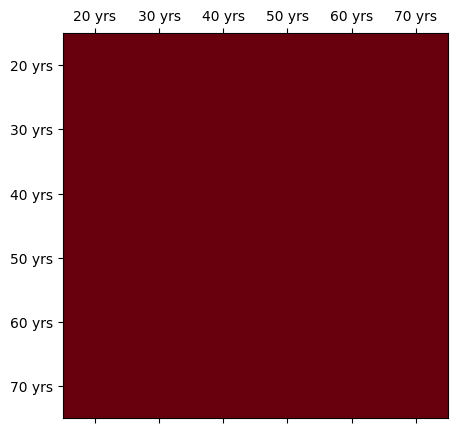

<Figure size 400x400 with 0 Axes>

In [297]:
data = np.matrix(all_age_mae)

fig, ax = plt.subplots()
plt.figure(figsize=(4, 4)) 
cmap = matplotlib.colors.ListedColormap(['white','red'])

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Reds', vmin=0, vmax=15)
age_keys = [str(num)+" yrs" for num in range(10,90,10)]
plt.rcParams.update({'font.size': 10})
ax.set_xticklabels(age_keys)
ax.set_yticklabels(age_keys)


for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, f"", ha='center', va='center', color = "white")
#bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3' )

plt.show()

In [278]:
print((charlton_point_dbp[0][50:0]))
# for i in range(0,len(charlton_point_dbp[0]),50): 
#         X = charlton_point_dbp[0][0:i] + charlton_point_dbp[0][i+cross_valid_space:len(charlton_point_dbp)]
#         print(X)        

[]


In [286]:

all_mea = []
cross_valid_space=50
for i in range(0,len(charlton_point_dbp[0]),50): 
    X = charlton_point_dbp[0][0:i] + charlton_point_dbp[0][i+cross_valid_space:len(charlton_point_dbp[0])]
    Y = np.array(charlton_point_dbp[1][0:i] +charlton_point_dbp[1][i+cross_valid_space:len(charlton_point_dbp[1])])
    
    X_other = charlton_point_dbp[0][i:i+50] 
    Y_other = np.array(charlton_point_dbp[1][i:i+50])

    tests_size = int(len(Y)*0.3)

    X_test= np.array(X)
    Y_test= np.array(Y)

    

    X_train= np.array(X_other)
    Y_train= np.array(Y_other)



    def create_model():
        model = Sequential()
        model.add(Conv1D(filters=16, kernel_size=3,strides=3, activation='relu', input_shape=((X_train).shape[1], 1)))
        model.add(Dropout(0.5))
        # model.add(Conv1D(64, kernel_size=3, strides=3, activation='relu'))
        # model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(1))


        optimizer = RMSprop(0.001)

        model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae',])

        return model
    model = create_model()
    
    history = model.fit(X_train, tf.stack(Y_train), epochs=50, validation_split=0.3)
    print(X_test)
    test_loss, test_accuracy = model.evaluate(X_test,tf.stack(Y_test) )


    print(test_accuracy)
    all_mea.append(test_accuracy)
        

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 4877.2710 - mae: 69.3376 - val_loss: 3443.8276 - val_mae: 58.3122
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3715.7771 - mae: 60.0241 - val_loss: 2993.9912 - val_mae: 54.1767
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3469.4431 - mae: 57.9057 - val_loss: 2611.3806 - val_mae: 50.3552
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2927.4846 - mae: 52.8070 - val_loss: 2289.7959 - val_mae: 46.8681
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2751.9587 - mae: 51.6464 - val_loss: 2001.0591 - val_mae: 43.4586
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1970.4429 - mae: 42.8144 - val_loss: 1798.2487 - val_mae: 40.8695
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1961.2725 - mae: 42.7726 - val_loss: 1573.6562 - val_mae: 37.7631
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1767.7676 - mae: 40.7021 - val_loss: 1376.5731 - val_mae: 34.7754
Epoch 9/50
2/2 ━

In [390]:
N = 3

# Data on X-axis
models_list = ("LinearRegression"," KNN","CNN")
LR_bar = (1,9.9, 16.5)
KNN_bar = (1.7, 10.3, 16.4)
CNN_bar = (13.9, 10.2, 16.3)

ind = np.arange(N)

plt.figure(figsize=(5,10))

width = 0.1       
plt.axhline(y=5, color='r', linestyle='-',)

plt.bar(ind, LR_bar , width, label='Blue bar label', color = "lightblue")
plt.bar(ind + width, KNN_bar, width, label='Orange bar label',color = "lightpink" )
plt.bar(ind + width*2, CNN_bar, width, label='Orange bar label', color = "red")
#plt.xticks([])

ax.set_yticks(ind, labels=models_list)

for i in range(len(models_list)):
    plt.text(i, models_list[i], 0,ha = 'center')


plt.ylabel("Mean Absolute Error")


Text(0, 0.5, 'Mean Absolute Error')

Error in callback <function _draw_all_if_interactive at 0x12760ff70> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: 'LinearRegression'

ConversionError: Failed to convert value(s) to axis units: 'LinearRegression'

<Figure size 500x1000 with 1 Axes>

<Axes: >

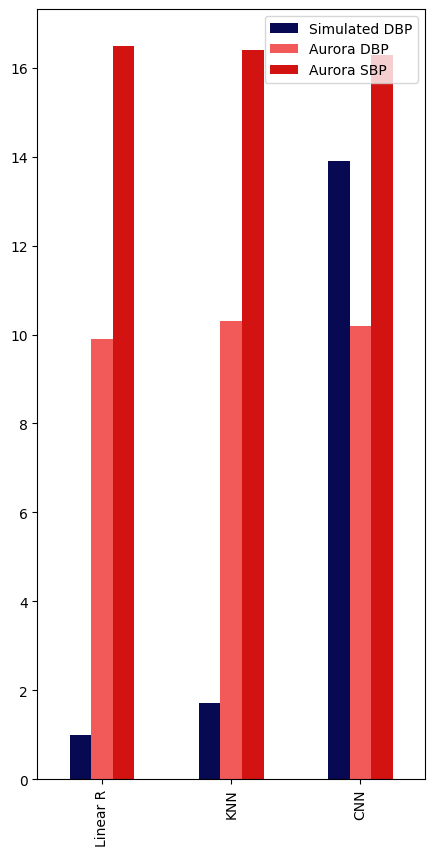

In [422]:
models_list = ("Linear Regression"," KNN","CNN")
# LR_bar = (1,9.9, 16.5)
# KNN_bar = (1.7, 10.3, 16.4)
# CNN_bar = (13.9, 10.2, 16.3)


simulated_data = (1,1.7, 13.9)
aura_dpb = (9.9, 10.3, 10.2)
auroa_sbp = (16.5, 16.4, 16.3)

_data = {'Simulated DBP': simulated_data,
        'Aurora DBP':aura_dpb,
        "Aurora SBP":auroa_sbp}
_df = pd.DataFrame(_data,columns=list(_data), index = ['Linear R', 'KNN', 'CNN'])

_df.plot.bar(figsize=(5,10),color=[ "#070A52", "#F15A59","#D21312" ])

# plt.show()

In [208]:

all_mea = []

for i in range(0,len(charlton_point_dbp),50): 



    X = charlton_point_dbp[0][0:i] +charlton_point_dbp[0][i+50:len(charlton_point_dbp)]
    Y = np.array(charlton_point_dbp[1][0:i] + charlton_point_dbp[1][i+50:len(charlton_point_dbp)])
    
    X_other = charlton_point_dbp[0][i:i+50] 
    Y_other = np.array(charlton_point_dbp[1][i:i+50])


    tests_size = int(len(Y)*0.3)

    X_test= np.array(X)
    Y_test= np.array(Y)

    # X_test = X_test.reshape(X_test.shape[0], -1)
    # Y_test = Y_test.reshape(Y_test.shape[0], -1)

    X_train= np.array(X_other)
    Y_train= np.array(Y_other)

    # X_train = X_test.reshape(X_test.shape[0], -1)
    # Y_train = Y_test.reshape(Y_test.shape[0], -1)


    neigh = LinearRegression()
        
    neigh = KNeighborsRegressor(n_neighbors=1)
    
    

    the_fit= neigh.fit(X_train, Y_train)

    y_predict= neigh.predict(X_test)


    plt.rcParams.update({'font.size': 10})

    plt.scatter(Y_test, y_predict,  color="darkgreen",  alpha=0.3 )
    plt.plot(Y_test, Y_test, color="blue", linewidth=2, alpha=0.9)

    plt.title(f"KNN")
    plt.title(f"Linear Regression")



    plt.xlabel("Tested DBP value")
    plt.ylabel("Predicted DBP value")

    xmin, xmax, ymin, ymax = plt.axis()
    plt.text(xmax+0.25, ymin+(ymax-ymin)*0.4,s=f"MAE {round(mean_absolute_error(Y_test, y_predict),2)}", fontsize=12)
    plt.text(xmax+0.25, ymin+(ymax-ymin)*0.2, s= f"RMS {round(root_mean_squared_error(Y_test, y_predict),2)}", fontsize=12)
    plt.text(xmax+0.25, ymin, s= f"r2 {round(r2_score(Y_test, y_predict),2)}", fontsize=12)


    print(test_accuracy)
    all_mea.append(test_accuracy)
        

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [327]:
#getting rid of bad keys(might need to go forever bc the graph is too messy

dictionary_path = "/Users/cslinxs/Desktop/all_weeks/summer24-lab/measurements_auscultatory_dictionary_ALL.pkl"

with open(dictionary_path, 'rb') as handle:
    all_auscultatory_dic = pickle.load(handle)

# all_auscultatory_dic
bad_keys = []
for key, each_grouping in all_auscultatory_dic.items():
    if True in list(np.isnan(each_grouping[0])):
        bad_keys.append(key)
print(bad_keys)

for key in bad_keys:
    del all_auscultatory_dic[key]

#double checking
for key, each_grouping in all_auscultatory_dic.items():
    if True in list(np.isnan(each_grouping[0])):
        print("um")


keys_for_grouping = [
"Calibration_start",
"Static_challenge_start",
"Seated_calibration",
"Static_seated_challenge",
"Exercise_challenge_start",
"Temporal_challenge_start",
"Temporal_seated_challenge"]


group_ppl = {}
group_ppl_age = {}
dict_people_diseases ={}
for key, each_grouping in list(all_auscultatory_dic.items()):
    person_id = key.split("_")[1].split("/")[1]
    # if person_id in list(people_htn):
    if "Temporal_seated_challenge" in key:
        if not(person_id in group_ppl):
            group_ppl[person_id] = []
        group_ppl[person_id].append({key: each_grouping})
    
        for age_key, age_group in dict_people_ages.items():
            
            if  person_id in list(age_group):# and person_id in list(people_htn):
                if not(age_key in group_ppl_age):
                    group_ppl_age[age_key] = []

                dict_people_desises

                group_ppl_age[age_key].append({key: each_grouping}) 
                
                

def get_person_data_group(diction, identifier):
    return ([([each_data[0] for each_data in item.values()]) for item in diction[identifier]], [([each_data[1] for each_data in item.values()][0]) for item in diction[identifier]], [item.keys() for item in diction[identifier]],[([each_data[2] for each_data in item.values()][0]) for item in diction[identifier]], [item.keys() for item in diction[identifier]])


['measurements_auscultatory/a064/a064.initial.Static_seated_challenge_1.tsv', 'measurements_auscultatory/a150/a150.return.Temporal_challenge_start_3.tsv', 'measurements_auscultatory/a328/a328.initial.Exercise_challenge_start_1.tsv', 'measurements_auscultatory/a578/a578.initial.Static_challenge_start_1.tsv', 'measurements_auscultatory/a596/a596.initial.Exercise_challenge_start_1.tsv', 'measurements_auscultatory/a642/a642.initial.Exercise_challenge_start_1.tsv', 'measurements_auscultatory/a648/a648.initial.Seated_calibration_1.tsv', 'measurements_auscultatory/a437/a437.initial.Exercise_challenge_start_2.tsv', 'measurements_auscultatory/a437/a437.return.Temporal_seated_challenge_2.tsv']


In [337]:

group_ppl = {}
group_ppl_age = {}
dict_people_diseases ={}
for key, each_grouping in list(all_auscultatory_dic.items()):
    person_id = key.split("_")[1].split("/")[1]
    # if person_id in list(people_htn):
    if "Temporal_seated_challenge" in key:
        if not(person_id in group_ppl):
            group_ppl[person_id] = []
        group_ppl[person_id].append({key: each_grouping})
        
        for age_key, age_group in dict_people_ages.items():
            
            if not(age_key in group_ppl_age):
                group_ppl_age[age_key] = []

            
            
            group_ppl_age[age_key].append({key: each_grouping}) 
                
                

In [338]:
group_ppl_age

{'20': [{'measurements_auscultatory/a002/a002.return.Temporal_seated_challenge_1.tsv': [array([ 0.57025265,  1.6654674 , 12.46612155, 29.00976301, 43.19548266,
           53.21660117, 59.27719904, 61.49554373, 60.48263872, 57.80376713,
           54.55798263, 51.42870842, 48.76324394, 46.32473875, 43.33232438,
           39.5230713 , 35.78852276, 33.09135226, 31.95238714, 31.92354636,
           32.85836825, 34.02764841, 34.84334725, 34.99859283, 34.52456522,
           33.71418215, 32.46429661, 30.76059209, 28.89280778, 26.85661604,
           24.74823694, 22.74689466, 20.81300924, 18.99785511, 17.35065591,
           15.89916449, 14.64115419, 13.52828477, 12.61692267, 11.72926492,
           10.7780301 ,  9.67551144,  8.62148806,  7.44401173,  6.13062715,
            4.89934201,  3.68642138,  2.83501178,  2.09513568,  1.44036038]),
    42    127.0
    Name: sbp, dtype: float64,
    42    73.0
    Name: dbp, dtype: float64]},
  {'measurements_auscultatory/a002/a002.return.Temporal_sea

(27, 50) (27, 1)
(1351, 50) (1351, 1)
Epoch 1/50


/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4672.7925 - mae: 65.0639 - val_loss: 3568.5020 - val_mae: 56.0199
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4186.7637 - mae: 59.8110 - val_loss: 3648.6580 - val_mae: 56.9431
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4061.9595 - mae: 58.8187 - val_loss: 3616.0176 - val_mae: 56.6465
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4064.2180 - mae: 58.8601 - val_loss: 3608.0940 - val_mae: 56.6082
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3968.3906 - mae: 58.0635 - val_loss: 3586.2598 - val_mae: 56.4285
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4046.3252 - mae: 58.5336 - val_loss: 3541.1711 - val_mae: 56.0085
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3918.6763 - mae: 57.5631 - val_loss: 3378.3848 - val_mae: 54.3466
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4002.3276 - mae: 57.9933 - val_loss: 3523.0469 - val_mae: 55.9359
Epoch 9/50
30/30 ━━

/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/3133707858.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_keys)
/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/3133707858.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(age_keys)


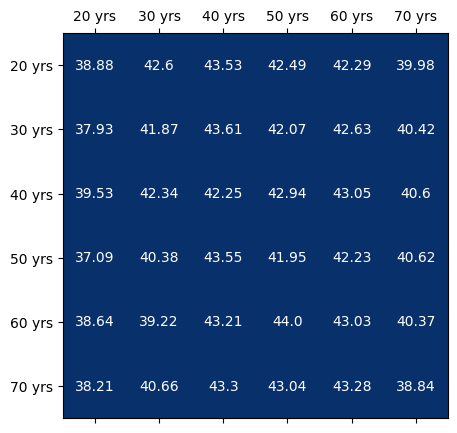

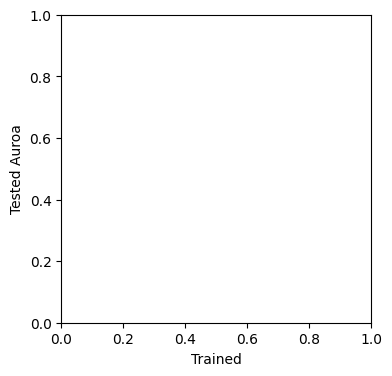

In [361]:
# heat plots

# single ones
#neigh = KNeighborsRegressor(n_neighbors=1)


all_age_mae= []
maxi_mean = 0
for training_age in range(20,80,10):
    training_age = str(training_age)

    this_age_mae = []
    for testing_age in range(20,80,10):
        testing_age= str(testing_age)
        


        # X = charlton_dict_people_ages[testing_age][0]
        # Y = charlton_dict_people_ages[testing_age][1]

        # X_other = get_person_data_group(group_ppl_age,testing_age)[0]
        # Y_other = get_person_data_group(group_ppl_age,testing_age)[3]

        X_other = charlton_dict_people_ages[testing_age][0]
        Y_other = charlton_dict_people_ages[testing_age][1]

        X = get_person_data_group(group_ppl_age,testing_age)[0]
        Y = get_person_data_group(group_ppl_age,testing_age)[3]



        tests_size = int(27)

        # X = charlton_dict_people_ages[testing_age][0]
        # Y = charlton_dict_people_ages[testing_age][1]

        # X_other = get_person_data_group(group_ppl_age,testing_age)[0]
        # Y_other = get_person_data_group(group_ppl_age,testing_age)[3]

        # X_other = charlton_dict_people_ages[testing_age][0]
        # Y_other = charlton_dict_people_ages[testing_age][1]

        # X = get_person_data_group(group_ppl_age,testing_age)[0]
        # Y = get_person_data_group(group_ppl_age,testing_age)[3]



        tests_size = int(27)

        X_train= np.array(X)
        Y_train= np.array(Y)

        X_train = X_train.reshape(X_train.shape[0], -1)
        Y_train = Y_train.reshape(Y_train.shape[0], -1)

        X_test= np.array(X_other[:])
        Y_test= np.array(Y_other[:])

        
        X_test = X_test.reshape(X_test.shape[0], -1)
        Y_test = Y_test.reshape(Y_test.shape[0], -1)


        print((X_test.shape),(Y_test.shape))

        def create_model():
            model = Sequential()
            model.add(Conv1D(filters=32, kernel_size=2,strides=2, activation='relu', input_shape=((X_train).shape[1], 1)))
            model.add(Dropout(0.5))
            model.add(Conv1D(64, kernel_size=5, strides=5, activation='relu'))
            model.add(Dropout(0.5))
            # model.add(Conv1D(128, kernel_size=3, strides=1, activation='relu'))
            # model.add(Dropout(0.5))
            model.add(Flatten())


            optimizer = RMSprop(0.001)

            model.compile(loss='mse',
                        optimizer=optimizer,
                        metrics=['mae',])

            return model
        model = create_model()
        print((X_train.shape),(Y_train.shape))
        history = model.fit(X_train, Y_train, epochs=50, validation_split=0.3)
        test_loss, test_accuracy = model.evaluate(X_test,tf.stack(Y_test) )


        print(test_accuracy)
        this_age_mae.append(test_accuracy)

    if max(this_age_mae)>maxi_mean:
        maxi_mean= max(this_age_mae)
    all_age_mae.append(this_age_mae)








data = np.matrix(all_age_mae)

fig, ax = plt.subplots()
plt.figure(figsize=(4, 4)) 
cmap = matplotlib.colors.ListedColormap(['white','blue'])


plt.xlabel("Trained")
plt.ylabel("Tested Auroa")

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Blues', vmin=0, vmax=15)
age_keys = [str(num)+" yrs" for num in range(10,90,10)]
plt.rcParams.update({'font.size': 10})
ax.set_xticklabels(age_keys)
ax.set_yticklabels(age_keys)

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, f"{round(z,2)}", ha='center', va='center', color = "white")
#bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3' )

plt.show()




/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/4060384866.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_keys)
/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/4060384866.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(age_keys)


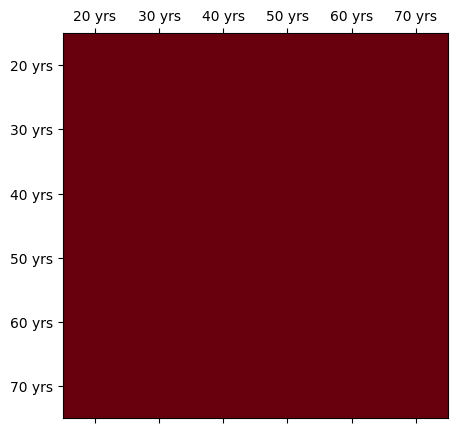

<Figure size 400x400 with 0 Axes>

In [359]:
data = np.matrix(all_age_mae)

fig, ax = plt.subplots()
plt.figure(figsize=(4, 4)) 
cmap = matplotlib.colors.ListedColormap(['white','red'])

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Reds', vmin=0, vmax=15)
age_keys = [str(num)+" yrs" for num in range(10,90,10)]
plt.rcParams.update({'font.size': 10})
ax.set_xticklabels(age_keys)
ax.set_yticklabels(age_keys)


for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, f"", ha='center', va='center', color = "white")
#bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3' )

plt.show()

In [423]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


In [426]:
X = np.array([[-1, -1], [-2, -1], [-3, -7], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 6.08276253],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

162


Text(79.455, 74.69500000000001, 'r2 -1.51')

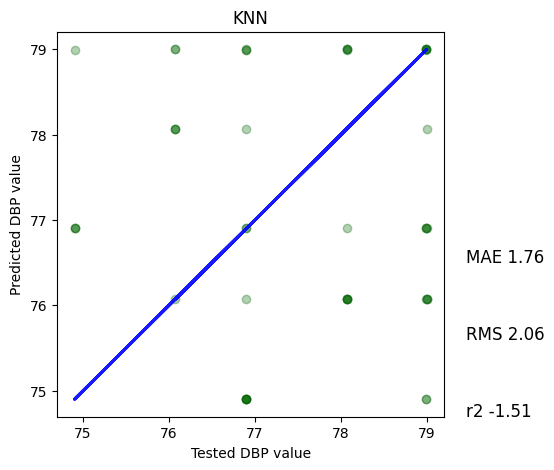

In [443]:
# single ones
plt.figure(figsize=(5, 5)) 
n_neighbors=1
neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
#neigh = LinearRegression()


all_points = np.array(charlton_point_dbp[0])
all_points = all_points.reshape(all_points.shape[0], -1)
print(len(all_points))
X_train, X_test, Y_train, Y_test = train_test_split(all_points, np.array(charlton_point_dbp[1]), test_size=0.3)


#X_test = X_test.reshape(X_test.shape[0], -1)

 
the_fit= neigh.fit(X_train, Y_train)

y_predict= neigh.predict(X_test)


plt.rcParams.update({'font.size': 10})

plt.scatter(Y_test, y_predict,  color="darkgreen",  alpha=0.3 )
plt.plot(Y_test, Y_test, color="blue", linewidth=2, alpha=0.9)

plt.title(f"KNN")



plt.xlabel("Tested DBP value")
plt.ylabel("Predicted DBP value")

xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.4,s=f"MAE {round(mean_absolute_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.2, s= f"RMS {round(root_mean_squared_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin, s= f"r2 {round(r2_score(Y_test, y_predict),2)}", fontsize=12)


SVR()


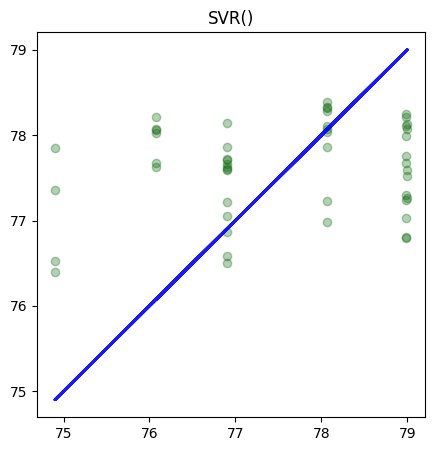

SGDRegressor()


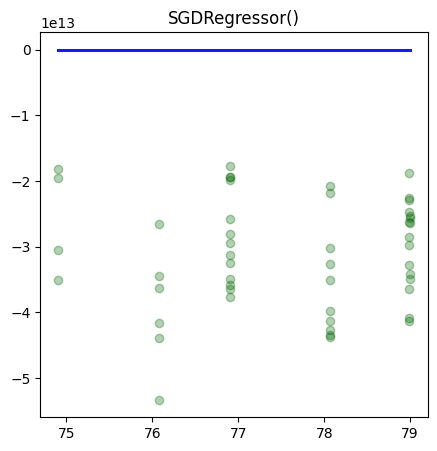

BayesianRidge()


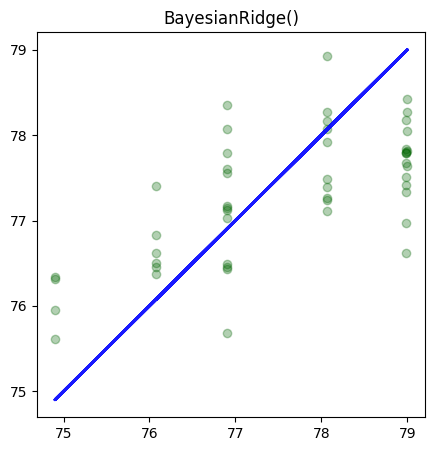

LassoLars()


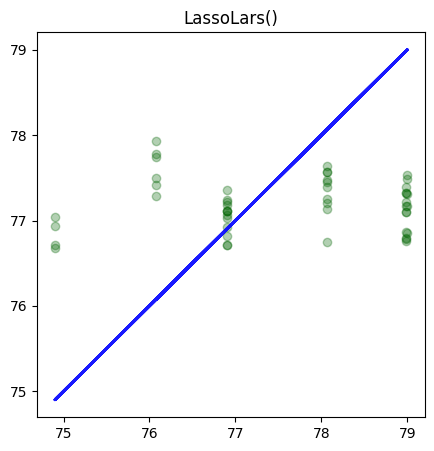

ARDRegression()


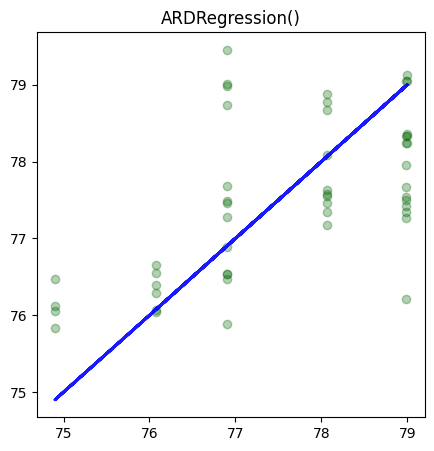

PassiveAggressiveRegressor()


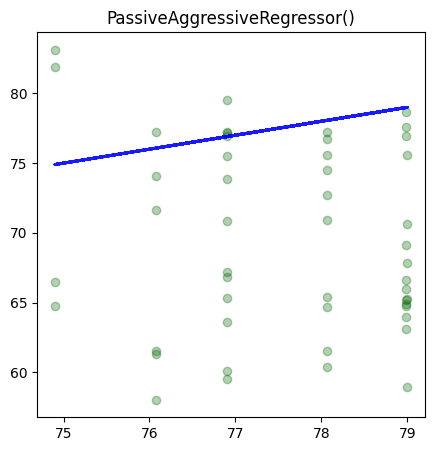

TheilSenRegressor()


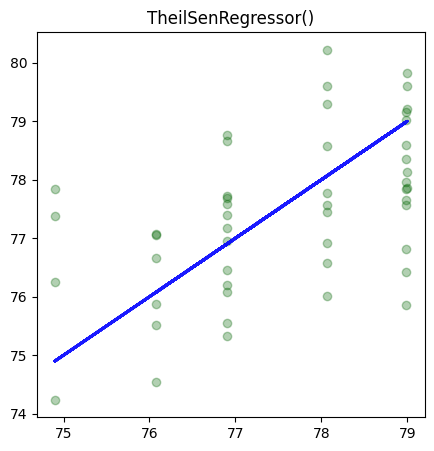

LinearRegression()


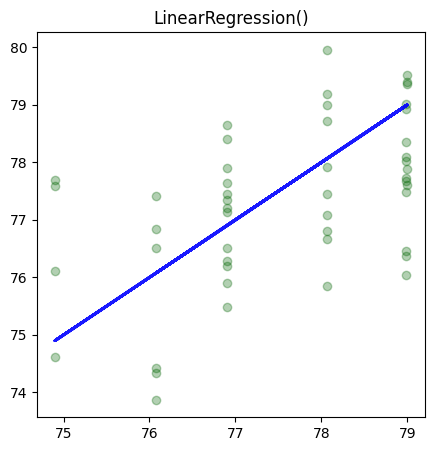

In [451]:


import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, Y_train)
    y_predict= clf.predict(X_test)
    plt.scatter(Y_test, y_predict,  color="darkgreen",  alpha=0.3 )
    plt.plot(Y_test, Y_test, color="blue", linewidth=2, alpha=0.9)

    plt.title(f"{item}")
    plt.show()
    

In [445]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = load_iris(return_X_y=True)

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, Y_train)
print(nca_pipe.score(X_test, Y_test))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [436]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

In [442]:
print(y_predict, Y_test)

[[79.   ]
 [74.9  ]
 [76.9  ]
 [76.9  ]
 [78.067]
 [78.067]
 [78.99 ]
 [78.067]
 [76.072]
 [76.9  ]
 [78.067]
 [78.067]
 [76.9  ]
 [78.067]
 [78.067]
 [78.99 ]
 [78.99 ]
 [78.067]
 [78.067]
 [76.9  ]
 [78.99 ]
 [79.   ]
 [74.9  ]
 [76.9  ]
 [74.9  ]
 [79.   ]
 [78.99 ]
 [78.99 ]
 [76.9  ]
 [79.   ]
 [76.9  ]
 [78.067]
 [76.9  ]
 [78.99 ]
 [79.   ]
 [76.9  ]
 [79.   ]
 [76.9  ]
 [76.9  ]
 [78.99 ]
 [79.   ]
 [79.   ]
 [76.9  ]
 [78.99 ]
 [76.072]
 [76.9  ]
 [76.9  ]
 [78.99 ]
 [78.067]] [[78.067]
 [76.072]
 [78.99 ]
 [76.9  ]
 [76.072]
 [76.072]
 [79.   ]
 [79.   ]
 [76.072]
 [74.9  ]
 [76.072]
 [76.072]
 [76.9  ]
 [74.9  ]
 [76.072]
 [79.   ]
 [79.   ]
 [76.072]
 [78.99 ]
 [74.9  ]
 [76.9  ]
 [78.99 ]
 [76.9  ]
 [74.9  ]
 [78.99 ]
 [76.072]
 [79.   ]
 [78.067]
 [79.   ]
 [76.9  ]
 [74.9  ]
 [78.99 ]
 [74.9  ]
 [76.9  ]
 [74.9  ]
 [78.067]
 [78.99 ]
 [74.9  ]
 [79.   ]
 [74.9  ]
 [76.072]
 [79.   ]
 [78.99 ]
 [78.067]
 [78.067]
 [78.067]
 [76.9  ]
 [78.99 ]
 [78.067]]


/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

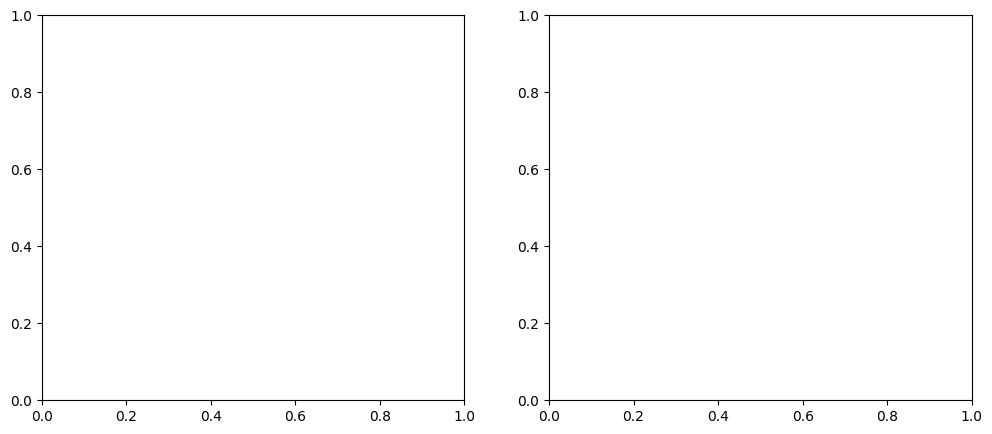

In [441]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))
y_predict = y_predict.reshape(y_predict.shape[0], -1)
for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(y_predict, Y_test)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

In [516]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

y = kmeans.fit_predict(all_points)

In [517]:
print(y)

[4 0 0 0 2 2 4 4 4 0 0 3 4 4 4 0 0 3 0 0 4 2 0 0 0 0 4 2 2 0 2 0 0 2 2 2 2
 0 0 2 2 2 4 1 4 1 0 3 0 3 4 1 4 1 0 3 0 3 4 1 4 1 0 3 2 3 4 1 4 0 0 3 2 2
 4 1 0 0 0 3 2 2 4 4 0 0 0 0 2 2 1 4 1 1 4 1 4 3 3 0 3 3 1 4 1 1 4 1 4 3 3
 0 3 3 1 4 1 4 4 3 0 3 3 0 3 2 4 4 1 4 4 3 0 3 0 2 3 2 4 4 4 0 0 3 2 2 0 2
 2 2 4 4 4 0 4 0 2 2 0 2 2 2]


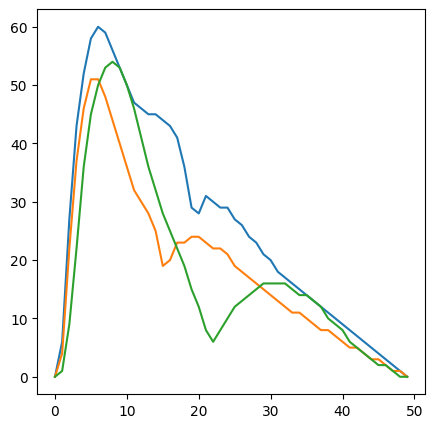

In [519]:
plt.plot(X_train[1])
plt.plot(X_train[2])
plt.plot(X_train[3])